In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate

In [13]:
pretrained_model_step_count = 550
task_sequence_step_count = 250

step_1 = pretrained_model_step_count + task_sequence_step_count
step_2 = step_1 + task_sequence_step_count
step_3 = step_2 + task_sequence_step_count

# Read results csv's of different task orders
order1 = pd.read_csv('results/s-o-h_u/results.csv')
order2 = pd.read_csv('results/o-s-h_u/results.csv')
order3 = pd.read_csv('results/h-o-s_u/results.csv')
order4 = pd.read_csv('results/o-h-s_u/results.csv')

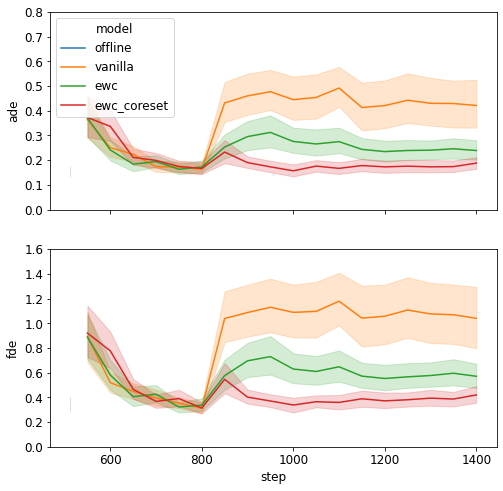

In [18]:
# ------------
# plot option 2
# ------------

def paper_plot1(order, task=0):
    """
    Plots the ADE/FDE with standard deviation for a single task across the entire learning sequence.
    In paper task 0 is used for order 1, where task 0 is square. 
    """
    plt.rcParams.update({'font.size': 12})
    fig, ax = plt.subplots(2, sharex=True, figsize=(8,8))
    g1 = sns.lineplot(data=order[order.task == 0], x="step", y="ade", hue='model', ax=ax[0])
    g2 = sns.lineplot(data=order[order.task == 0], x="step", y="fde", hue='model', ax=ax[1], legend=None)
    # plt.legend(loc='upper left')
    g1.set_ylim([0,0.8])
    g2.set_ylim([0,1.6])
    plt.savefig('results_square.svg', format="svg")

paper_plot1(order1)

In [19]:
def extract_means(df, model):
    """
    Function which extracts the average ADE/FDE of every model at the end of a task sequence.
    The average ADE/FDE is given for all previously seen tasks.
    All values are evaluated on unseen validation sets.

    Example:
        sequence => task0 -> task1 -> task2

        result => [
            ADE_task0 evaluated after training on task0 (step_1)
            FDE_task0 evaluated after training on task0 (step_1)
            ADE_task0 evaluated after training on task1 (step_2)
            FDE_task0 evaluated after training on task1 (step_2)
            ADE_task0 evaluated after training on task2 (step_3)
            FDE_task0 evaluated after training on task2 (step_3)
            ADE_task1 evaluated after training on task1 (step_2)
            FDE_task1 evaluated after training on task1 (step_2)
            ADE_task1 evaluated after training on task2 (step_3)
            FDE_task1 evaluated after training on task2 (step_3)
            ADE_task2 evaluated after training on task2 (step_3)
            FDE_task2 evaluated after training on task2 (step_3)
        ]
    """
    return [
        df[df.step == step_1][df.model == model][df.task == 0][['ade']].mean(),
        df[df.step == step_1][df.model == model][df.task == 0][['fde']].mean(),
        df[df.step == step_2][df.model == model][df.task == 0][['ade']].mean(),
        df[df.step == step_2][df.model == model][df.task == 0][['fde']].mean(),
        df[df.step == step_3][df.model == model][df.task == 0][['ade']].mean(),
        df[df.step == step_3][df.model == model][df.task == 0][['fde']].mean(),
        df[df.step == step_2][df.model == model][df.task == 1][['ade']].mean(),
        df[df.step == step_2][df.model == model][df.task == 1][['fde']].mean(),
        df[df.step == step_3][df.model == model][df.task == 1][['ade']].mean(),
        df[df.step == step_3][df.model == model][df.task == 1][['fde']].mean(),
        df[df.step == step_3][df.model == model][df.task == 2][['ade']].mean(),
        df[df.step == step_3][df.model == model][df.task == 2][['fde']].mean()
    ]

def extract_means_diffs(df, model):
    """
    Function which extracts the average ADE/FDE of every model directly after training,
    and subsequently lists the difference in ADE/FDE for the next sequences.
    All values are evaluated on unseen validation sets.

    Example:
        sequence => task0 -> task1 -> task2

        result => [
            ADE_task0 evaluated after training on task0 (step_1)
            FDE_task0 evaluated after training on task0 (step_1)
            ADE_task0 evaluated after training on task1 (step_2) - ADE_task0 evaluated after training on task0 (step_1)
            FDE_task0 evaluated after training on task1 (step_2) - FDE_task0 evaluated after training on task0 (step_1)
            ADE_task0 evaluated after training on task2 (step_3) - ADE_task0 evaluated after training on task1 (step_2)
            FDE_task0 evaluated after training on task2 (step_3) - FDE_task0 evaluated after training on task1 (step_2)
            ADE_task1 evaluated after training on task1 (step_2)
            FDE_task1 evaluated after training on task1 (step_2)
            ADE_task1 evaluated after training on task2 (step_3) - ADE_task1 evaluated after training on task1 (step_2)
            FDE_task1 evaluated after training on task2 (step_3) - FDE_task1 evaluated after training on task1 (step_2)
            ADE_task2 evaluated after training on task2 (step_3)
            FDE_task2 evaluated after training on task2 (step_3)
        ]
    """
    return [
        df[df.step == step_1][df.model == model][df.task == 0][['ade']].mean(),
        df[df.step == step_1][df.model == model][df.task == 0][['fde']].mean(),
        df[df.step == step_2][df.model == model][df.task == 0][['ade']].mean()-df[df.step == step_1][df.model == model][df.task == 0][['ade']].mean(),
        df[df.step == step_2][df.model == model][df.task == 0][['fde']].mean()-df[df.step == step_1][df.model == model][df.task == 0][['fde']].mean(),
        df[df.step == step_3][df.model == model][df.task == 0][['ade']].mean()-df[df.step == step_2][df.model == model][df.task == 0][['ade']].mean(),
        df[df.step == step_3][df.model == model][df.task == 0][['fde']].mean()-df[df.step == step_2][df.model == model][df.task == 0][['fde']].mean(),
        df[df.step == step_2][df.model == model][df.task == 1][['ade']].mean(),
        df[df.step == step_2][df.model == model][df.task == 1][['fde']].mean(),
        df[df.step == step_3][df.model == model][df.task == 1][['ade']].mean()-df[df.step == step_2][df.model == model][df.task == 1][['ade']].mean(),
        df[df.step == step_3][df.model == model][df.task == 1][['fde']].mean()-df[df.step == step_2][df.model == model][df.task == 1][['fde']].mean(),
        df[df.step == step_3][df.model == model][df.task == 2][['ade']].mean(),
        df[df.step == step_3][df.model == model][df.task == 2][['fde']].mean()
    ]

def extract_final_means_diffs(df, model):
    """
    Function which extracts the average ADE/FDE of every model directly after training,
    and subsequently lists the difference in ADE/FDE for only the final sequence.
    All values are evaluated on unseen validation sets.

    Example:
        sequence => task0 -> task1 -> task2

        result => [
            ADE_task0 evaluated after training on task0 (step_1)
            FDE_task0 evaluated after training on task0 (step_1)
            ADE_task0 evaluated after training on task2 (step_3) - ADE_task0 evaluated after training on task0 (step_1)
            FDE_task0 evaluated after training on task2 (step_3) - FDE_task0 evaluated after training on task0 (step_1)
            ADE_task1 evaluated after training on task1 (step_2)
            FDE_task1 evaluated after training on task1 (step_2)
            ADE_task1 evaluated after training on task2 (step_3) - ADE_task1 evaluated after training on task1 (step_2)
            FDE_task1 evaluated after training on task2 (step_3) - FDE_task1 evaluated after training on task1 (step_2)
            ADE_task2 evaluated after training on task2 (step_3)
            FDE_task2 evaluated after training on task2 (step_3)
        ]
    """
    return [
        df[df.step == step_3][df.model == model][df.task == 0][['ade']].mean(),
        df[df.step == step_3][df.model == model][df.task == 0][['fde']].mean(),
        df[df.step == step_3][df.model == model][df.task == 0][['ade']].mean()-df[df.step == step_1][df.model == model][df.task == 0][['ade']].mean(),
        df[df.step == step_3][df.model == model][df.task == 0][['fde']].mean()-df[df.step == step_1][df.model == model][df.task == 0][['fde']].mean(),
        df[df.step == step_3][df.model == model][df.task == 1][['ade']].mean(),
        df[df.step == step_3][df.model == model][df.task == 1][['fde']].mean(),
        df[df.step == step_3][df.model == model][df.task == 1][['ade']].mean()-df[df.step == step_2][df.model == model][df.task == 1][['ade']].mean(),
        df[df.step == step_3][df.model == model][df.task == 1][['fde']].mean()-df[df.step == step_2][df.model == model][df.task == 1][['fde']].mean(),
        df[df.step == step_3][df.model == model][df.task == 2][['ade']].mean(),
        df[df.step == step_3][df.model == model][df.task == 2][['fde']].mean()
    ]

def extract_final_means_diffs_summed(df, model):
    """
    Function which lists only the difference in final average ADE/FDE and averages this for all tasks.
    All values are evaluated on unseen validation sets.

    Example:
        sequence => task0 -> task1 -> task2

        result => [
            ( (ADE_task0 evaluated after training on task2 (step_3) - ADE_task0 evaluated after training on task0 (step_1)) +
            (ADE_task1 evaluated after training on task2 (step_3) - ADE_task1 evaluated after training on task1 (step_2)) )/2

            ( (FDE_task0 evaluated after training on task2 (step_3) - FDE_task0 evaluated after training on task0 (step_1)) +
            (FDE_task1 evaluated after training on task2 (step_3) - FDE_task1 evaluated after training on task1 (step_2)) )/2

            ADE_task1 evaluated after training on task2 (step_3) - ADE_task1 evaluated after training on task1 (step_2)

            FDE_task1 evaluated after training on task2 (step_3) - FDE_task1 evaluated after training on task1 (step_2)
        ]
    """
    return [
        ( (df[df.step == step_3][df.model == model][df.task == 0][['ade']].mean()-df[df.step == step_1][df.model == model][df.task == 0][['ade']].mean()) +
          (df[df.step == step_3][df.model == model][df.task == 1][['ade']].mean()-df[df.step == step_2][df.model == model][df.task == 1][['ade']].mean()) )/2,
        ( (df[df.step == step_3][df.model == model][df.task == 0][['fde']].mean()-df[df.step == step_1][df.model == model][df.task == 0][['fde']].mean()) +
          (df[df.step == step_3][df.model == model][df.task == 1][['fde']].mean()-df[df.step == step_2][df.model == model][df.task == 1][['fde']].mean()) )/2,
        (df[df.step == step_3][df.model == model][df.task == 0][['ade']].mean() + df[df.step == step_3][df.model == model][df.task == 1][['ade']].mean() + df[df.step == step_3][df.model == model][df.task == 2][['ade']].mean()) /3,
        (df[df.step == step_3][df.model == model][df.task == 0][['fde']].mean() + df[df.step == step_3][df.model == model][df.task == 1][['fde']].mean() + df[df.step == step_3][df.model == model][df.task == 2][['fde']].mean()) /3,
    ]

In [20]:
row1 = ['vanilla'] + extract_means(order1, 'vanilla') + extract_means(order2, 'vanilla') + extract_means(order3, 'vanilla') + extract_means(order4, 'vanilla')
row2 = ['ewc'] + extract_means(order1, 'ewc') + extract_means(order2, 'ewc') + extract_means(order3, 'ewc') + extract_means(order4, 'ewc')
row3 = ['ewc_coreset'] + extract_means(order1, 'ewc_coreset') + extract_means(order2, 'ewc_coreset') + extract_means(order3, 'ewc_coreset') + extract_means(order4, 'ewc_coreset')
full_values = tabulate([row1, row2, row3], tablefmt='latex', floatfmt=".2f")

/home/chadi/Dev/online-learning_ws/src/online-learning-trajectory-prediction/venv/online-learning/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/chadi/Dev/online-learning_ws/src/online-learning-trajectory-prediction/venv/online-learning/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/chadi/Dev/online-learning_ws/src/online-learning-trajectory-prediction/venv/online-learning/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/chadi/Dev/online-learning_ws/src/online-learning-trajectory-prediction/venv/online-learning/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/chadi/Dev/online-learning_ws/src/online-learning-trajectory-prediction/venv/online

In [22]:
row1 = ['vanilla'] + extract_means_diffs(order1, 'vanilla') + extract_means_diffs(order2, 'vanilla') + extract_means_diffs(order3, 'vanilla') + extract_means_diffs(order4, 'vanilla')
row2 = ['ewc'] + extract_means_diffs(order1, 'ewc') + extract_means_diffs(order2, 'ewc') + extract_means_diffs(order3, 'ewc') + extract_means_diffs(order4, 'ewc')
row3 = ['ewc_coreset'] + extract_means_diffs(order1, 'ewc_coreset') + extract_means_diffs(order2, 'ewc_coreset') + extract_means_diffs(order3, 'ewc_coreset') + extract_means_diffs(order4, 'ewc_coreset')
diffs = tabulate([row1, row2, row3], tablefmt='latex', floatfmt=".2f")

/home/chadi/Dev/online-learning_ws/src/online-learning-trajectory-prediction/venv/online-learning/lib/python3.6/site-packages/ipykernel_launcher.py:65: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/chadi/Dev/online-learning_ws/src/online-learning-trajectory-prediction/venv/online-learning/lib/python3.6/site-packages/ipykernel_launcher.py:65: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/chadi/Dev/online-learning_ws/src/online-learning-trajectory-prediction/venv/online-learning/lib/python3.6/site-packages/ipykernel_launcher.py:66: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/chadi/Dev/online-learning_ws/src/online-learning-trajectory-prediction/venv/online-learning/lib/python3.6/site-packages/ipykernel_launcher.py:66: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/chadi/Dev/online-learning_ws/src/online-learning-trajectory-prediction/venv/online

In [23]:
row1 = ['vanilla'] + extract_final_means_diffs(order1, 'vanilla') + extract_final_means_diffs(order2, 'vanilla') + extract_final_means_diffs(order3, 'vanilla') + extract_final_means_diffs(order4, 'vanilla')
row2 = ['ewc'] + extract_final_means_diffs(order1, 'ewc') + extract_final_means_diffs(order2, 'ewc') + extract_final_means_diffs(order3, 'ewc') + extract_final_means_diffs(order4, 'ewc')
row3 = ['ewc_coreset'] + extract_final_means_diffs(order1, 'ewc_coreset') + extract_final_means_diffs(order2, 'ewc_coreset') + extract_final_means_diffs(order3, 'ewc_coreset') + extract_final_means_diffs(order4, 'ewc_coreset')
diff_only_final = tabulate([row1, row2, row3], tablefmt='latex', floatfmt=".2f")

/home/chadi/Dev/online-learning_ws/src/online-learning-trajectory-prediction/venv/online-learning/lib/python3.6/site-packages/ipykernel_launcher.py:102: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/chadi/Dev/online-learning_ws/src/online-learning-trajectory-prediction/venv/online-learning/lib/python3.6/site-packages/ipykernel_launcher.py:102: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/chadi/Dev/online-learning_ws/src/online-learning-trajectory-prediction/venv/online-learning/lib/python3.6/site-packages/ipykernel_launcher.py:103: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/chadi/Dev/online-learning_ws/src/online-learning-trajectory-prediction/venv/online-learning/lib/python3.6/site-packages/ipykernel_launcher.py:103: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/chadi/Dev/online-learning_ws/src/online-learning-trajectory-prediction/venv/on